In [20]:
# Convolutional Neural Network

# Importing the libraries
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [21]:
# Part 1 - Data Preprocessing

# Preprocessing the Training set
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/machine learning new/machine learning/training',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

# Preprocessing the Test set
test_datagen = ImageDataGenerator(rescale = 1./255)
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/machine learning new/machine learning/validation',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 1106 images belonging to 1 classes.
Found 272 images belonging to 1 classes.


In [23]:
# Part 2 - Building the CNN

# Initialising the CNN
cnn = tf.keras.models.Sequential()

# Step 1 - Convolution
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[64, 64, 3]))
## input_shape is the size of the image 3 is rgb channel
## kernel size is filter size 
##number of filters are 32
##activation function is relu

# Step 2 - Pooling
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
##adding a pooling layer 
## size of the max pooling layer is 2*2 and strides 2 
##so here we are adding one convolution layer and one max pooling layer.

# Adding a second convolutional layer
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
##keras tuner helps to understand number of layers needed in cnn
##output of max pooling layer is added to the flattening layer. 


# Step 3 - Flattening
cnn.add(tf.keras.layers.Flatten())
##now the output is in matrix form so it will convert matrix to array

# Step 4 - Full Connection
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))
##now it will be transferred to fully connected layer where 128 hidden neurons are present. Hidden neurons have weight assigned
#to them. 

# Step 5 - Output Layer
cnn.add(tf.keras.layers.Dense(units=10, activation='softmax'))
##the output of fully connected layer is passed to the output layer. In the output layer units = 10 specifies number of categories
##since we have 10 categories we define units as 10. 
##if its multiclass classification problem we will use activation function as softmax. Binary uses sigmoid. 

In [24]:
cnn.summary()

##parameters denotes the number of weights we are creating. Weights and bias are basically the parameters. 
##output shape denotes pixels

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 29, 29, 32)        9248      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 6272)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)               802944    
_________________________________________________________________
dense_5 (Dense)              (None, 10)               

In [25]:
# Part 3 - Training the CNN

# Compiling the CNN
cnn.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

##why we using adam optimizer ?
##because it is having a learning rate of 0.001(Mathematical Significance), as its having more than 2 categories we are using
##categorical_crossentropy and metrics we used accuracy to know the accuracy

# Training the CNN on the Training set and evaluating it on the Test set
cnn.fit(x = training_set, validation_data = test_set, epochs = 25)

##we used epochs 25. 35 times number of iterations happened. 

Epoch 1/25
35/35 [==============================] - 31s 897ms/step - loss: 1789.8176 - accuracy: 0.2179 - val_loss: 8148.1675 - val_accuracy: 0.0000e+00
Epoch 2/25
35/35 [==============================] - 30s 865ms/step - loss: 38623.4531 - accuracy: 0.2206 - val_loss: 96096.4609 - val_accuracy: 0.9926
Epoch 3/25
35/35 [==============================] - 31s 875ms/step - loss: 182714.8281 - accuracy: 0.2884 - val_loss: 260878.1406 - val_accuracy: 0.0000e+00
Epoch 4/25
35/35 [==============================] - 30s 867ms/step - loss: 328166.8438 - accuracy: 0.1591 - val_loss: 417127.4062 - val_accuracy: 0.0000e+00
Epoch 5/25
35/35 [==============================] - 31s 886ms/step - loss: 524141.0312 - accuracy: 0.1157 - val_loss: 597531.6875 - val_accuracy: 0.0000e+00
Epoch 6/25
35/35 [==============================] - 31s 878ms/step - loss: 557675.3125 - accuracy: 0.1157 - val_loss: 317679.5625 - val_accuracy: 0.0000e+00
Epoch 7/25
35/35 [==============================] - 31s 873ms/step -

In [26]:
# save it as a h5 file


from tensorflow.keras.models import load_model

cnn.save('model_monkey.h5')

In [39]:
# Part 4 - Making a single prediction

import numpy as np
from tensorflow.keras.preprocessing import image
test_image = image.load_img('/content/drive/MyDrive/machine learning new/machine learning/validation/validation/n9/n9021.jpg', target_size = (64, 64))
test_image = image.img_to_array(test_image)
test_image=test_image/255
##feature scaling on the text image 
test_image = np.expand_dims(test_image, axis = 0)
##then we will expand the dimension of the test image
result = cnn.predict(test_image)
##then we are predicting the value. Then on the basis of the prediction wherever 1 comes the prediction is there.

In [40]:
result

array([[0., 0., 0., 0., 0., 0., 0., 0., 1., 0.]], dtype=float32)

In [43]:
preds=np.argmax(result, axis=1)
#np.argmax is the category where the image belongs to. It will give the index of the category to which image belongs to.

In [44]:
if preds==0:
   preds="Monkey's name is mantled_howler"
elif preds==1:
   preds="Monkey's name is patas_monkey"
elif preds==2:
   preds="Monkey's name is bald_uakari"
elif preds==3:
   preds="Monkey's name is japanese_macaque"
elif preds==4:
   preds="Monkey's name is pygmy_marmoset"
elif preds==5:
   preds="Monkey's name is white_headed_capuchin"
elif preds==6:
   preds="Monkey's name is silvery_marmoset"
elif preds==7:
   preds="Monkey's name is common_squirrel_monkey"
elif preds==8:
   preds="Monkey's name is black_headed_night_monkey"
else:
   preds="Monkey's name is nilgiri_langur"

In [45]:
preds

"Monkey's name is black_headed_night_monkey"

In [46]:
###VGG16 - we will remove the top layer. 

import tensorflow as tf
print(tf.__version__)

2.3.0


In [47]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
#import matplotlib.pyplot as plt

In [48]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = '/content/drive/MyDrive/machine learning new/machine learning/training'
valid_path = '/content/drive/MyDrive/machine learning new/machine learning/validation'

In [49]:
IMAGE_SIZE +[3]
#rgb channel is 3

[224, 224, 3]

In [50]:
# Import the VGG16 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

vgg16 = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)
##this imagenet has lot many images where weights are assigned to the images
##vgg16 all filters are same 
##only one time padding

58892288/58889256 [==============================] - 1s 0us/step


In [51]:
vgg16.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [52]:
# don't train existing weights
for layer in vgg16.layers:
    layer.trainable = False
    
##in vgg16 we use the same weights. The weights from imagenet to train our model without retraining our model from scratch. 
##Disadvantges - 
## 1. Number of paramaters is highest. So, we use inception v3. 

In [73]:
  # useful for getting number of output classes
folders = glob('/content/drive/MyDrive/machine learning new/machine learning/training/training/*')

##glob function helps to find the number of folders in the train data. In VGG16 we are removing the last layer and we are adding
##our own layers. 

In [74]:
folders

['/content/drive/MyDrive/machine learning new/machine learning/training/training/n0',
 '/content/drive/MyDrive/machine learning new/machine learning/training/training/n2',
 '/content/drive/MyDrive/machine learning new/machine learning/training/training/n4',
 '/content/drive/MyDrive/machine learning new/machine learning/training/training/n7',
 '/content/drive/MyDrive/machine learning new/machine learning/training/training/n1',
 '/content/drive/MyDrive/machine learning new/machine learning/training/training/n5',
 '/content/drive/MyDrive/machine learning new/machine learning/training/training/n9',
 '/content/drive/MyDrive/machine learning new/machine learning/training/training/n8',
 '/content/drive/MyDrive/machine learning new/machine learning/training/training/n3',
 '/content/drive/MyDrive/machine learning new/machine learning/training/training/n6']

In [75]:
# our layers - you can add more if you want
x = Flatten()(vgg16.output)

In [76]:
x

<tf.Tensor 'flatten_7/Reshape:0' shape=(None, 25088) dtype=float32>

In [77]:
len(folders)

10

In [78]:
prediction = Dense(len(folders), activation='softmax')(x)
##number of categories more than 2 hence used softmax

# create a model object
model = Model(inputs=vgg16.input, outputs=prediction)

In [79]:
# view the structure of the model
model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)      

In [80]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [81]:
##vgg19
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [84]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/machine learning new/machine learning/training/training',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 1106 images belonging to 10 classes.


In [87]:
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/machine learning new/machine learning/validation/validation',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 272 images belonging to 10 classes.


In [88]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=20,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/20
35/35 [==============================] - 41s 1s/step - loss: 2.0783 - accuracy: 0.3996 - val_loss: 1.1075 - val_accuracy: 0.6691
Epoch 2/20
35/35 [==============================] - 40s 1s/step - loss: 0.7544 - accuracy: 0.7577 - val_loss: 0.8873 - val_accuracy: 0.7132
Epoch 3/20
35/35 [==============================] - 40s 1s/step - loss: 0.4551 - accuracy: 0.8644 - val_loss: 0.7376 - val_accuracy: 0.7500
Epoch 4/20
35/35 [==============================] - 40s 1s/step - loss: 0.3269 - accuracy: 0.9204 - val_loss: 0.6984 - val_accuracy: 0.7794
Epoch 5/20
35/35 [==============================] - 40s 1s/step - loss: 0.2394 - accuracy: 0.9476 - val_loss: 0.6546 - val_accuracy: 0.8051
Epoch 6/20
35/35 [==============================] - 40s 1s/step - loss: 0.1815 - accuracy: 0.9629 - val_loss: 0.6340 - val_accuracy: 0.7978
Epoch 7/20
35/35 [==============================] - 40s 1s/step - loss: 0.1356 - acc

In [89]:
import tensorflow as tf
print(tf.__version__)

2.3.0


In [90]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
#import matplotlib.pyplot as plt

In [91]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = '/content/drive/MyDrive/machine learning new/machine learning/training/training'
valid_path = '/content/drive/MyDrive/machine learning new/machine learning/validation/validation'

In [92]:
IMAGE_SIZE +[3]

[224, 224, 3]

In [93]:
vgg19 = VGG19(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

80142336/80134624 [==============================] - 0s 0us/step


In [94]:
vgg19.summary()

Model: "vgg19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [95]:
# don't train existing weights
for layer in vgg19.layers:
    layer.trainable = False

In [98]:
  # useful for getting number of output classes
folders = glob('/content/drive/MyDrive/machine learning new/machine learning/training/training/*')

In [99]:
folders

['/content/drive/MyDrive/machine learning new/machine learning/training/training/n0',
 '/content/drive/MyDrive/machine learning new/machine learning/training/training/n2',
 '/content/drive/MyDrive/machine learning new/machine learning/training/training/n4',
 '/content/drive/MyDrive/machine learning new/machine learning/training/training/n7',
 '/content/drive/MyDrive/machine learning new/machine learning/training/training/n1',
 '/content/drive/MyDrive/machine learning new/machine learning/training/training/n5',
 '/content/drive/MyDrive/machine learning new/machine learning/training/training/n9',
 '/content/drive/MyDrive/machine learning new/machine learning/training/training/n8',
 '/content/drive/MyDrive/machine learning new/machine learning/training/training/n3',
 '/content/drive/MyDrive/machine learning new/machine learning/training/training/n6']

In [100]:
# our layers - you can add more if you want
x = Flatten()(vgg19.output)

In [101]:
x

<tf.Tensor 'flatten_8/Reshape:0' shape=(None, 25088) dtype=float32>

In [102]:
len(folders)

10

In [103]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=vgg19.input, outputs=prediction)

In [104]:
# view the structure of the model
model.summary()

Model: "functional_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)      

In [105]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [106]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [108]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/machine learning new/machine learning/training/training',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 1106 images belonging to 10 classes.


In [109]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=20,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Epoch 1/20
35/35 [==============================] - 43s 1s/step - loss: 2.3521 - accuracy: 0.3400 - val_loss: 1.2583 - val_accuracy: 0.5956
Epoch 2/20
35/35 [==============================] - 41s 1s/step - loss: 1.0540 - accuracy: 0.6456 - val_loss: 0.9419 - val_accuracy: 0.6949
Epoch 3/20
35/35 [==============================] - 40s 1s/step - loss: 0.6372 - accuracy: 0.8047 - val_loss: 0.8320 - val_accuracy: 0.7426
Epoch 4/20
35/35 [==============================] - 40s 1s/step - loss: 0.4678 - accuracy: 0.8653 - val_loss: 0.8676 - val_accuracy: 0.7390
Epoch 5/20
35/35 [==============================] - 40s 1s/step - loss: 0.3894 - accuracy: 0.9024 - val_loss: 0.8342 - val_accuracy: 0.7316
Epoch 6/20
35/35 [==============================] - 40s 1s/step - loss: 0.2946 - accuracy: 0.9250 - val_loss: 0.7393 - val_accuracy: 0.7647
Epoch 7/20
35/35 [==============================] - 40s 1s/step - loss: 0.2528 - accuracy: 0.9295 - val_loss: 0.7633 - val_accuracy: 0.7794
Epoch 8/20
35/35 [==

In [111]:
import tensorflow as tf
print(tf.__version__)

2.3.0


In [112]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
#import matplotlib.pyplot as plt

In [113]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = '/content/drive/MyDrive/machine learning new/machine learning/training/training'
valid_path = '/content/drive/MyDrive/machine learning new/machine learning/validation/validation'

In [114]:
IMAGE_SIZE +[3]

[224, 224, 3]

In [115]:
inception_v3 = InceptionV3(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

87916544/87910968 [==============================] - 0s 0us/step


In [116]:
inception_v3.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv2d_6 (Conv2D)               (None, 111, 111, 32) 864         input_3[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 111, 111, 32) 96          conv2d_6[0][0]                   
__________________________________________________________________________________________________
activation (Activation)         (None, 111, 111, 32) 0           batch_normalization[0][0]        
_______________________________________________________________________________________

In [117]:
# don't train existing weights
for layer in inception_v3.layers:
    layer.trainable = False

In [118]:
 # useful for getting number of output classes
folders = glob('/content/drive/MyDrive/machine learning new/machine learning/training/training/*')

In [119]:
folders

['/content/drive/MyDrive/machine learning new/machine learning/training/training/n0',
 '/content/drive/MyDrive/machine learning new/machine learning/training/training/n2',
 '/content/drive/MyDrive/machine learning new/machine learning/training/training/n4',
 '/content/drive/MyDrive/machine learning new/machine learning/training/training/n7',
 '/content/drive/MyDrive/machine learning new/machine learning/training/training/n1',
 '/content/drive/MyDrive/machine learning new/machine learning/training/training/n5',
 '/content/drive/MyDrive/machine learning new/machine learning/training/training/n9',
 '/content/drive/MyDrive/machine learning new/machine learning/training/training/n8',
 '/content/drive/MyDrive/machine learning new/machine learning/training/training/n3',
 '/content/drive/MyDrive/machine learning new/machine learning/training/training/n6']

In [120]:
# our layers - you can add more if you want
x = Flatten()(inception_v3.output)

In [121]:
x

<tf.Tensor 'flatten_9/Reshape:0' shape=(None, 51200) dtype=float32>

In [122]:
len(folders)

10

In [123]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=inception_v3.input, outputs=prediction)

In [124]:
# view the structure of the model
model.summary()

Model: "functional_5"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv2d_6 (Conv2D)               (None, 111, 111, 32) 864         input_3[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 111, 111, 32) 96          conv2d_6[0][0]                   
__________________________________________________________________________________________________
activation (Activation)         (None, 111, 111, 32) 0           batch_normalization[0][0]        
_______________________________________________________________________________________

In [125]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [127]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [128]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/machine learning new/machine learning/training/training',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 1106 images belonging to 10 classes.


In [129]:
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/machine learning new/machine learning/validation/validation',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 272 images belonging to 10 classes.


In [130]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=20,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Epoch 1/20
35/35 [==============================] - 42s 1s/step - loss: 3.3316 - accuracy: 0.7712 - val_loss: 0.9747 - val_accuracy: 0.9522
Epoch 2/20
35/35 [==============================] - 41s 1s/step - loss: 0.4442 - accuracy: 0.9539 - val_loss: 0.7324 - val_accuracy: 0.9301
Epoch 3/20
35/35 [==============================] - 40s 1s/step - loss: 0.3273 - accuracy: 0.9647 - val_loss: 0.6953 - val_accuracy: 0.9596
Epoch 4/20
35/35 [==============================] - 39s 1s/step - loss: 0.2366 - accuracy: 0.9801 - val_loss: 0.4336 - val_accuracy: 0.9706
Epoch 5/20
35/35 [==============================] - 40s 1s/step - loss: 0.2599 - accuracy: 0.9702 - val_loss: 0.4691 - val_accuracy: 0.9669
Epoch 6/20
35/35 [==============================] - 41s 1s/step - loss: 0.3150 - accuracy: 0.9684 - val_loss: 0.7652 - val_accuracy: 0.9596
Epoch 7/20
35/35 [==============================] - 40s 1s/step - loss: 0.1626 - accuracy: 0.9846 - val_loss: 0.3899 - val_accuracy: 0.9559
Epoch 8/20
35/35 [==

In [131]:
import matplotlib.pyplot as plt

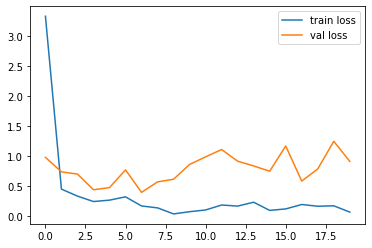

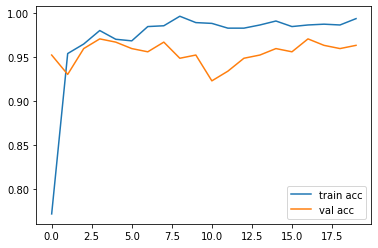

<Figure size 432x288 with 0 Axes>

In [132]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')


##always accuracy should be more and loss should be less. Here train and testing accuracy is close. Hence, good model. In inception v3 we got the highest accuracy.

In [133]:
# save it as a h5 file


from tensorflow.keras.models import load_model

model.save('model_inception.h5')

In [134]:
y_pred = model.predict(test_set)

In [135]:
y_pred

array([[3.1575601e-24, 0.0000000e+00, 5.0224881e-18, ..., 4.0951245e-03,
        1.8941173e-15, 0.0000000e+00],
       [4.4820213e-19, 0.0000000e+00, 1.0000000e+00, ..., 0.0000000e+00,
        2.9877083e-35, 0.0000000e+00],
       [0.0000000e+00, 1.3264215e-25, 4.4687000e-29, ..., 0.0000000e+00,
        0.0000000e+00, 1.0000000e+00],
       ...,
       [0.0000000e+00, 1.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 1.0000000e+00],
       [1.9613357e-38, 3.9708726e-31, 0.0000000e+00, ..., 0.0000000e+00,
        1.0000000e+00, 0.0000000e+00]], dtype=float32)

In [136]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [137]:
y_pred

array([6, 2, 9, 0, 6, 0, 4, 2, 7, 6, 8, 4, 9, 6, 7, 5, 9, 4, 2, 6, 7, 4,
       1, 8, 7, 9, 0, 2, 8, 0, 9, 0, 7, 2, 4, 6, 2, 5, 8, 0, 8, 5, 1, 9,
       4, 5, 8, 7, 2, 1, 3, 3, 5, 9, 1, 6, 2, 7, 9, 1, 0, 3, 0, 1, 2, 1,
       8, 7, 6, 5, 6, 1, 1, 7, 4, 2, 1, 6, 0, 9, 5, 2, 7, 5, 6, 1, 2, 4,
       7, 8, 0, 0, 2, 5, 8, 7, 0, 8, 2, 5, 9, 3, 8, 1, 0, 3, 4, 3, 3, 1,
       3, 8, 1, 9, 6, 8, 9, 9, 5, 6, 5, 9, 9, 2, 4, 8, 3, 2, 7, 3, 3, 3,
       3, 5, 9, 0, 2, 4, 9, 6, 4, 4, 5, 5, 7, 9, 5, 8, 3, 9, 7, 3, 4, 7,
       0, 8, 3, 1, 0, 1, 8, 2, 8, 8, 4, 3, 5, 5, 3, 6, 8, 7, 0, 4, 7, 7,
       2, 3, 3, 7, 4, 1, 6, 7, 0, 5, 1, 8, 6, 4, 5, 8, 4, 3, 7, 6, 6, 0,
       4, 4, 6, 4, 7, 7, 3, 8, 0, 7, 2, 5, 2, 1, 5, 5, 0, 2, 9, 9, 0, 6,
       1, 0, 8, 7, 3, 7, 6, 0, 5, 1, 8, 9, 2, 6, 0, 1, 0, 3, 9, 6, 1, 1,
       6, 3, 0, 4, 0, 1, 1, 6, 6, 4, 7, 9, 3, 9, 4, 3, 8, 7, 2, 2, 5, 5,
       5, 9, 6, 2, 2, 1, 9, 8])